In [38]:
from locallib import eyeutil
from matplotlib import pyplot as plt
from collections import Counter
import math
import random


# Quotient

In [87]:
def count_quotient(message, counter):
    for i in range(len(message) - 1):
        a = message[i]
        b = message[i + 1]

        if a == 0 and b == 0:
            counter[(0, 0)] += 1
            continue

        gcd = math.gcd(a, b)
        counter[(a // gcd, b // gcd)] += 1


Eye:
(66, 5) 9
(3, 5) 8
(5, 49) 7
(25, 18) 7
(1, 0) 6

Random:
(0, 1) 11.802
(1, 0) 11.8
(1, 1) 11.75
(2, 1) 5.782
(1, 2) 5.714


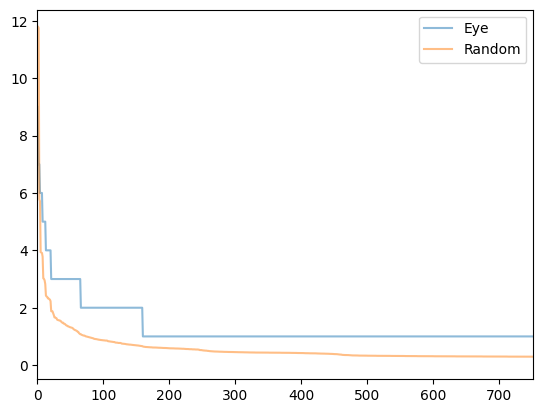

In [102]:
trials = 500

eye_counter = Counter()
for msg in eyeutil.msgs_eye_tri:
    count_quotient(msg, eye_counter)

rand_counter = Counter()
for i in range(trials):
    message = [ random.randint(0, 82) for _ in range(1000) ]
    count_quotient(message, rand_counter)
rand_counter = {k: v / trials for k, v in rand_counter.items()}

print("Eye:")
eye_counter_Sorted = sorted(eye_counter.items(), key=lambda x: x[1], reverse=True)
for k, v in eye_counter_Sorted[:5]:
    print(k, v)

print("\nRandom:")
rand_counter_Sorted = sorted(rand_counter.items(), key=lambda x: x[1], reverse=True)
for k, v in rand_counter_Sorted[:5]:
    print(k, v)

# Plot sorted values
plt.figure()
plt.plot([v for k, v in eye_counter_Sorted], label="Eye", alpha=0.5)
plt.plot([v for k, v in rand_counter_Sorted], label="Random", alpha=0.5)
plt.xlim(0, len(eye_counter_Sorted))
plt.legend()
plt.show()


# Ratio

In [83]:
def count_ratio(message, ratio):
    count = 0
    count_a = 0
    count_b = 0
    for i in range(len(message) - 1):
        a = message[i]
        b = message[i + 1]
        if a == b * ratio or b == a * ratio:
            count += 1
        if a == b * ratio:
            count_a += 1
        if b == a * ratio:
            count_b += 1
    return count, count_a, count_b


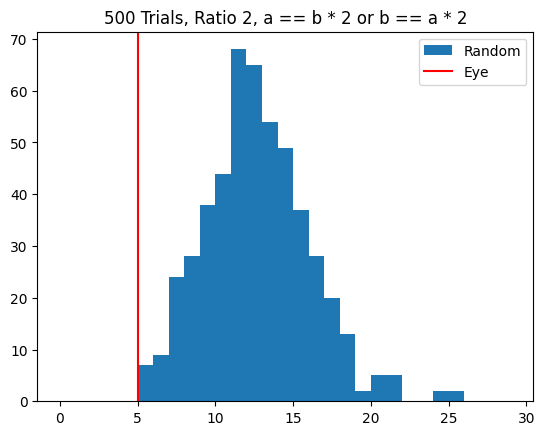

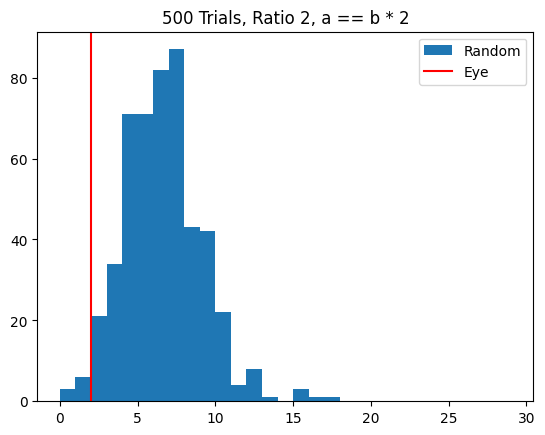

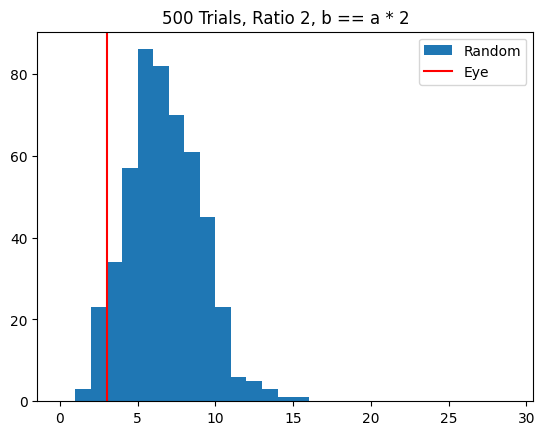

In [84]:
ratio = 2
trials = 500

eye_count, eye_count_a, eye_count_b = 0, 0, 0
for msg in eyeutil.msgs_eye_tri:
    msg_eye_count, msg_eye_count_a, msg_eye_count_b = count_ratio(msg, ratio)
    eye_count += msg_eye_count
    eye_count_a += msg_eye_count_a
    eye_count_b += msg_eye_count_b

rand_counts = []
rand_counts_a = []
rand_counts_b = []
for i in range(trials):
    message = [ random.randint(0, 82) for _ in range(1000) ]
    rand_count, rand_count_a, rand_count_b = count_ratio(message, ratio)
    rand_counts.append(rand_count)
    rand_counts_a.append(rand_count_a)
    rand_counts_b.append(rand_count_b)

plt.title("500 Trials, Ratio 2, a == b * 2 or b == a * 2")
plt.hist(rand_counts, bins=range(0, 30), label='Random')
plt.axvline(eye_count, color='r', label='Eye')
plt.legend(loc='upper right')
plt.show()

plt.title("500 Trials, Ratio 2, a == b * 2")
plt.hist(rand_counts_a, bins=range(0, 30), label='Random')
plt.axvline(eye_count_a, color='r', label='Eye')
plt.legend(loc='upper right')
plt.show()

plt.title("500 Trials, Ratio 2, b == a * 2")
plt.hist(rand_counts_b, bins=range(0, 30), label='Random')
plt.axvline(eye_count_b, color='r', label='Eye')
plt.legend(loc='upper right')
plt.show()


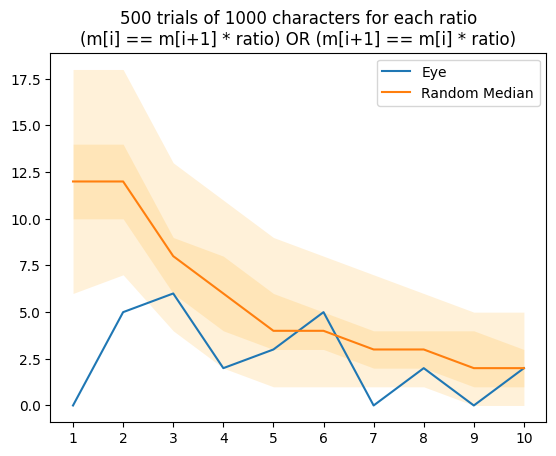

In [113]:
ratios = range(1, 11)
trials = 500

eye_counts = []
rand_counts_5 = []
rand_counts_25 = []
rand_counts_med = []
rand_counts_75 = []
rand_counts_95 = []

for ratio in ratios:
    eye_counts_ratio = []
    for msg in eyeutil.msgs_eye_tri:
        msg_eye_count, _, _ = count_ratio(msg, ratio)
        eye_counts_ratio.append(msg_eye_count)
    eye_counts.append(sum(eye_counts_ratio))

    rand_counts_ratio = []
    for i in range(trials):
        message = [ random.randint(0, 82) for _ in range(1000) ]
        rand_count, _, _ = count_ratio(message, ratio)
        rand_counts_ratio.append(rand_count)
    
    # Calculate the 25th, 50th, and 75th percentiles
    rand_counts_ratio.sort()
    rand_counts_5.append(rand_counts_ratio[int(trials * 0.05)])
    rand_counts_25.append(rand_counts_ratio[int(trials * 0.25)])
    rand_counts_med.append(rand_counts_ratio[int(trials * 0.50)])
    rand_counts_75.append(rand_counts_ratio[int(trials * 0.75)])
    rand_counts_95.append(rand_counts_ratio[int(trials * 0.95)])

plt.title("500 trials of 1000 characters for each ratio\n(m[i] == m[i+1] * ratio) OR (m[i+1] == m[i] * ratio)")
plt.plot(ratios, eye_counts, label="Eye")
plt.plot(ratios, rand_counts_med, label="Random Median")
plt.fill_between(ratios, rand_counts_25, rand_counts_75, alpha=0.15, color='orange', linewidth=0)
plt.fill_between(ratios, rand_counts_5, rand_counts_95, alpha=0.15, color='orange', linewidth=0)
plt.xticks(ratios)
plt.legend()
plt.show()
